Best tree-depth and Score
tree-depth    4.00000
Score         0.55102
Name: 3, dtype: float64


Text(0.5, 1.0, 'decision tree accuracy')

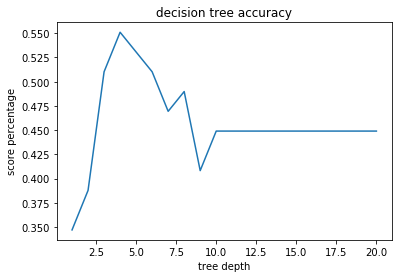

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

flags = pd.read_csv("flags.csv", header = 0)

# select features and labels to build the model
labels = flags['Landmass']
data = flags[['Red','Green','Blue','Gold','White','Black','Orange', 'Crosses', 'Saltires', 'Quarters', 'Sunstars', 'Crescent', 'Triangle']]

# train test split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)


# iterate through tree depths to find optimum model
scores = []
score_vector = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    scores += [tree.score(test_data, test_labels)]
    
    score_vector.append([i, scores[i-1]])

# locate the maximum score and return the corresponding row with integer tree-depth
df = pd.DataFrame(score_vector, columns=['tree-depth', 'Score'])
tree_best = df.loc[df['Score'].idxmax()]
print("Best tree-depth and Score")
print(tree_best)


plt.plot(range(1,21), scores)
plt.xlabel('tree depth')
plt.ylabel('score percentage')
plt.title('decision tree accuracy')